# Import Library

In [1]:
import nltk
import pandas as pd
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict,Counter
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


In [2]:
!pip install nltk

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Import File

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/nlp/text_retrieval_system/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/nlp/text_retrieval_system/test.csv')[:10]
df_train['description'].head(),df_test['description'].head()

(0    A South African hoodlum named Tsotsi (Presley ...
 1    In 1974 a 12-year-old girl is abducted from a ...
 2    Private investigator Alexa Crow always fights ...
 3    Hip-hop artist and CEO of Empire Entertainment...
 4    Aaron Davis (Steve Sandvoss), a young Mormon, ...
 Name: description, dtype: object,
 0    Ellen DeGeneres serves as executive producer o...
 1    A collage of film images and ambient dance sou...
 2    Set in the 1970s, this ensemble comedy follows...
 3    "Breeders" explores the paradox experienced by...
 4    The lives of Mark and his daughter, Eleanor, w...
 Name: description, dtype: object)

## Capital to small

In [6]:
# transform capital to small
df_train['description'] = df_train['description'].map(lambda x : x.lower())
df_test['description'] = df_test['description'].map(lambda x : x.lower())
df_train['description'].head(),df_test['description'].head()

(0    a south african hoodlum named tsotsi (presley ...
 1    in 1974 a 12-year-old girl is abducted from a ...
 2    private investigator alexa crow always fights ...
 3    hip-hop artist and ceo of empire entertainment...
 4    aaron davis (steve sandvoss), a young mormon, ...
 Name: description, dtype: object,
 0    ellen degeneres serves as executive producer o...
 1    a collage of film images and ambient dance sou...
 2    set in the 1970s, this ensemble comedy follows...
 3    "breeders" explores the paradox experienced by...
 4    the lives of mark and his daughter, eleanor, w...
 Name: description, dtype: object)

## Stop word

In [7]:
english_stop_word = set(stopwords.words('english'))
df_train['description'] = df_train['description'].apply(lambda x: ' '.join([word_sentence for word_sentence in x.split() if word_sentence not in (english_stop_word)]))
df_test['description'] = df_test['description'].apply(lambda x: ' '.join([word_sentence for word_sentence in x.split() if word_sentence not in (english_stop_word)]))
df_train['description'].head(),df_test['description'].head()


(0    south african hoodlum named tsotsi (presley ch...
 1    1974 12-year-old girl abducted small church-go...
 2    private investigator alexa crow always fights ...
 3    hip-hop artist ceo empire entertainment, lucio...
 4    aaron davis (steve sandvoss), young mormon, ar...
 Name: description, dtype: object,
 0    ellen degeneres serves executive producer come...
 1    collage film images ambient dance sounds jacqu...
 2    set 1970s, ensemble comedy follows traditional...
 3    "breeders" explores paradox experienced nearly...
 4    lives mark daughter, eleanor, forever changed ...
 Name: description, dtype: object)

## Lemmatization

In [8]:
df_train['description'] = df_train['description'].apply(lambda x: " ". join([w.lemmatize() for w in TextBlob(x).words]))
df_test['description'] = df_test['description'].apply(lambda x: " ". join([w.lemmatize() for w in TextBlob(x).words]))
df_train['description'].head(),df_test['description'].head()

(0    south african hoodlum named tsotsi presley chw...
 1    1974 12-year-old girl abducted small church-go...
 2    private investigator alexa crow always fight g...
 3    hip-hop artist ceo empire entertainment luciou...
 4    aaron davis steve sandvoss young mormon arrive...
 Name: description, dtype: object,
 0    ellen degeneres serf executive producer comedy...
 1    collage film image ambient dance sound jacques...
 2    set 1970s ensemble comedy follows traditional ...
 3    breeder explores paradox experienced nearly pa...
 4    life mark daughter eleanor forever changed 10 ...
 Name: description, dtype: object)

## Stemming

In [9]:
stem_english = SnowballStemmer("english")
df_train['description'] = df_train['description'].apply(lambda x: stem_english.stem(x))
df_test['description'] = df_test['description'].apply(lambda x: stem_english.stem(x))
df_train['description'].head(),df_test['description'].head()

(0    south african hoodlum named tsotsi presley chw...
 1    1974 12-year-old girl abducted small church-go...
 2    private investigator alexa crow always fight g...
 3    hip-hop artist ceo empire entertainment luciou...
 4    aaron davis steve sandvoss young mormon arrive...
 Name: description, dtype: object,
 0    ellen degeneres serf executive producer comedy...
 1    collage film image ambient dance sound jacques...
 2    set 1970s ensemble comedy follows traditional ...
 3    breeder explores paradox experienced nearly pa...
 4    life mark daughter eleanor forever changed 10 ...
 Name: description, dtype: object)

## Regular Expression

In [10]:
df_train['description'] = df_train['description'].apply(lambda x: re.sub(r'\W', ' ', x)) # Remove special characters
df_train['description'] = df_train['description'].apply(lambda x: re.sub(r'\s+', ' ', x)) # Remove extra spaces
df_train['description'] = df_train['description'].apply(lambda x: re.sub('\s+[a-zA-Z]\s+', ' ', x)) # Removes single characters
df_train['description'] = df_train['description'].apply(lambda x: re.sub('\s+', ' ', x)) # Removes multiple spaces

df_test['description'] = df_test['description'].apply(lambda x: re.sub(r'\W', ' ', x)) # Remove special characters
df_test['description'] = df_test['description'].apply(lambda x: re.sub(r'\s+', ' ', x)) # Remove extra spaces
df_test['description'] = df_test['description'].apply(lambda x: re.sub('\s+[a-zA-Z]\s+', ' ', x)) # Removes single characters
df_test['description'] = df_test['description'].apply(lambda x: re.sub('\s+', ' ', x)) # Removes multiple spaces
df_train['description'].head(),df_test['description'].head()


(0    south african hoodlum named tsotsi presley chw...
 1    1974 12 year old girl abducted small church go...
 2    private investigator alexa crow always fight g...
 3    hip hop artist ceo empire entertainment luciou...
 4    aaron davis steve sandvoss young mormon arrive...
 Name: description, dtype: object,
 0    ellen degeneres serf executive producer comedy...
 1    collage film image ambient dance sound jacques...
 2    set 1970s ensemble comedy follows traditional ...
 3    breeder explores paradox experienced nearly pa...
 4    life mark daughter eleanor forever changed 10 ...
 Name: description, dtype: object)

# Data Visualization

Text(0.5, 1.0, 'test_length_character')

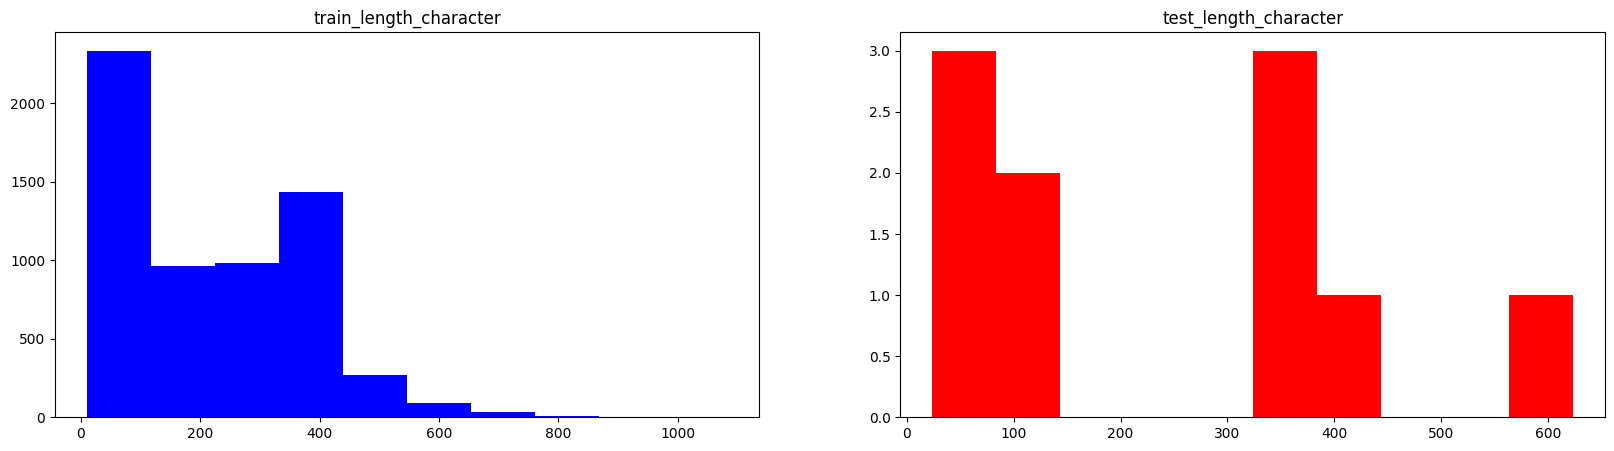

In [11]:
# length character
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))

train_count=df_train['description'].str.len()
ax1.hist(train_count,color='Blue')
ax1.set_title('train_length_character')

test_count=df_test['description'].str.len()
ax2.hist(test_count,color='Red')
ax2.set_title('test_length_character')



Text(0.5, 1.0, 'test_length_word')

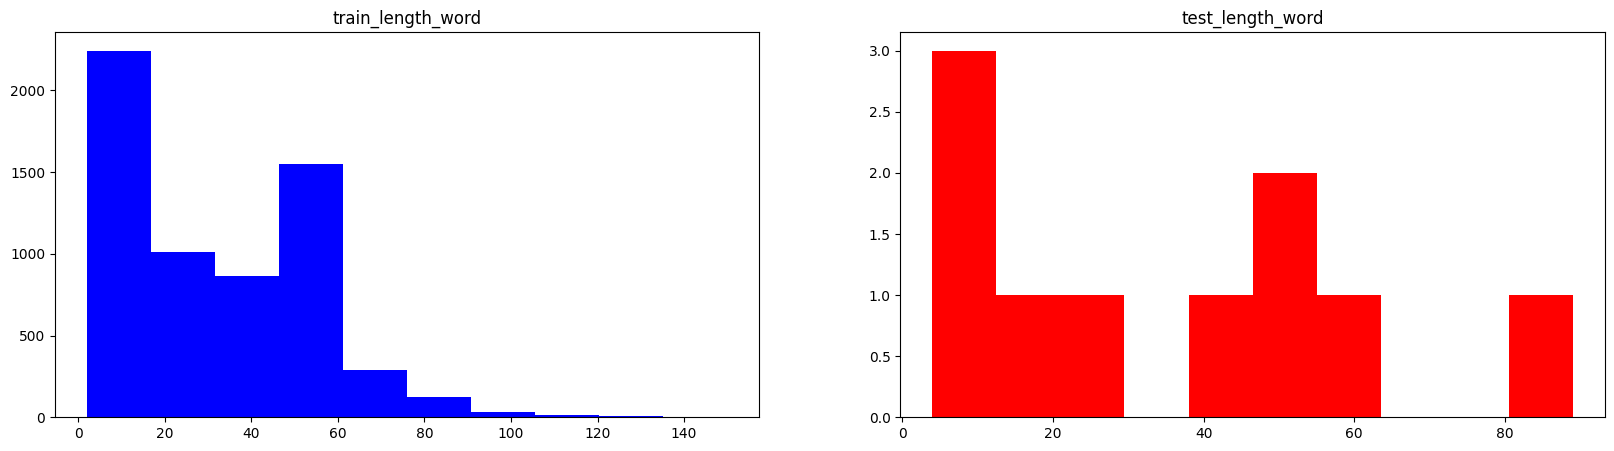

In [12]:
# length word
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))

train_count=df_train['description'].str.split().map(lambda x: len(x))
ax1.hist(train_count,color='Blue')
ax1.set_title('train_length_word')

test_count=df_test['description'].str.split().map(lambda x: len(x))
ax2.hist(test_count,color='Red')
ax2.set_title('test_length_word')

<Axes: >

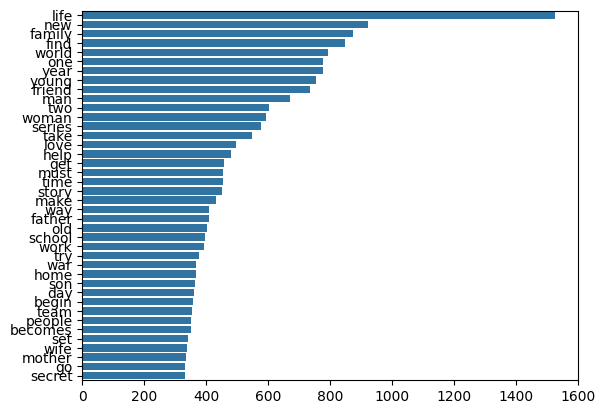

In [13]:
corpus_word=[]

for x in df_train['description'].str.split():
    for i in x:
        corpus_word.append(i)

counter=Counter(corpus_word)
most_word=counter.most_common()
x=[]
y=[]
for word_sentence,count_sentence in most_word[:40]:
    if (word_sentence not in english_stop_word) :
        x.append(word_sentence)
        y.append(count_sentence)
sns.barplot(x=y,y=x)

<Axes: >

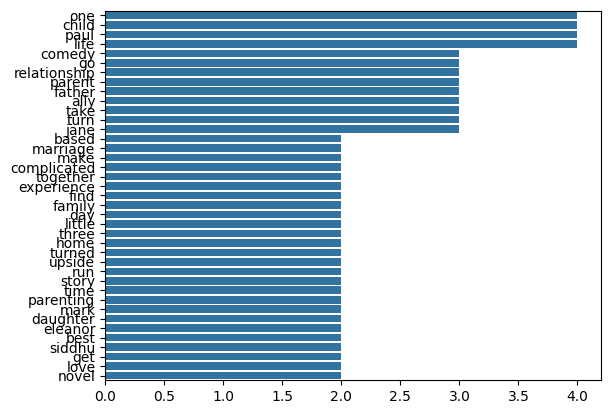

In [14]:
corpus_word=[]

for x in df_test['description'].str.split():
    for i in x:
        corpus_word.append(i)

counter=Counter(corpus_word)
most_word=counter.most_common()
x=[]
y=[]
for word_sentence,count_sentence in most_word[:40]:
    if (word_sentence not in english_stop_word) :
        x.append(word_sentence)
        y.append(count_sentence)
sns.barplot(x=y,y=x)

# TF-IDF with inverted file algorithm

In [15]:
class InvertedFileIndex:
    def __init__(self):
        self.index = {}

    def add_invert(self, word, doc_id):
        if word not in self.index:
            self.index[word] = []
        self.index[word].append(doc_id)

    # def get_invert(self, word):
    #     return self.index.get_invert(word, [])
    def get(self, word):
        return self.index.get(word, [])




In [16]:
# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_train['description'])

# Building the inverted file
inverted_file_function = InvertedFileIndex()
feature_name_sentence = tfidf_vectorizer.get_feature_names_out()
for i, feature_name in enumerate(feature_name_sentence):
    document_ids = tfidf_matrix[:, i].nonzero()[0]
    for document_id in document_ids:
        inverted_file_function.add_invert(feature_name, document_id)

# Example of searching the inverted file
def search_inverted_file_index(query_word):
    # clean_data
    query_word = query_word.lower()
    query_word = ' '.join([word_sentence for word_sentence in query_word.split() if word_sentence not in (english_stop_word)])
    query_word = " ". join([w.lemmatize() for w in TextBlob(query_word).words])
    query_word = stem_english.stem(query_word)
    query_word = re.sub(r'\W', ' ', query_word)
    query_word = re.sub(r'\s+', ' ', query_word)
    query_word = re.sub('\s+[a-zA-Z]\s+', ' ', query_word)
    query_word = re.sub('\s+', ' ', query_word)

    query_word_terms = query_word.split()
    document_ids = set()
    for word in query_word_terms:
        # print(word)
        document_ids.update(inverted_file_function.get(word))
    return document_ids

# Example search
query_word = "Ellen DeGeneres serves as executive producer of this comedy that is based on a Danish series of the same name. Lena and Martin were certain enough that their marriage was over to make it official and go through the complicated untangling involved in filing for divorce. The last thing that they expected was to be brought back together by the experience, but they find their relationship strangely reignited by the experience. Together, they navigate their evolving relationship with open minds and newly reopened hearts."
results_words = search_inverted_file_index(query_word)
print(f"Documents matching query '{query_word}': {results_words}")

Documents matching query 'Ellen DeGeneres serves as executive producer of this comedy that is based on a Danish series of the same name. Lena and Martin were certain enough that their marriage was over to make it official and go through the complicated untangling involved in filing for divorce. The last thing that they expected was to be brought back together by the experience, but they find their relationship strangely reignited by the experience. Together, they navigate their evolving relationship with open minds and newly reopened hearts.': {0, 3, 4, 5, 8, 14, 21, 22, 23, 24, 28, 29, 30, 34, 36, 37, 38, 41, 42, 47, 48, 50, 51, 53, 57, 58, 59, 61, 62, 67, 68, 69, 71, 74, 75, 76, 78, 81, 83, 84, 85, 86, 88, 93, 96, 98, 99, 100, 103, 106, 107, 108, 109, 111, 112, 115, 116, 118, 120, 121, 123, 125, 126, 130, 132, 139, 140, 142, 143, 149, 151, 152, 154, 155, 157, 158, 159, 161, 164, 165, 170, 172, 173, 174, 178, 179, 180, 182, 184, 186, 188, 189, 191, 192, 194, 195, 196, 197, 198, 199, 2

# SVM model

In [17]:


# Split the train data
X_train, X_validation, y_train, y_validation = train_test_split(tfidf_matrix, df_train['title'], test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Validate the model
y_prediction = svm_model.predict(X_validation)
accuracy = accuracy_score(y_validation, y_prediction)
print(f"SVM Model Accuracy: {accuracy}")


SVM Model Accuracy: 0.026101141924959218


In [18]:
def preprocess(query_word):
    query_word = query_word.lower()
    query_word = ' '.join([word_sentence for word_sentence in query_word.split() if word_sentence not in (english_stop_word)])
    query_word = " ". join([w.lemmatize() for w in TextBlob(query_word).words])
    query_word = stem_english.stem(query_word)
    query_word = re.sub(r'\W', ' ', query_word)
    query_word = re.sub(r'\s+', ' ', query_word)
    query_word = re.sub('\s+[a-zA-Z]\s+', ' ', query_word)
    query_word = re.sub('\s+', ' ', query_word)
    return query_word

In [19]:
def find_top_3_similar_svm(query):
    word_tfidf = tfidf_vectorizer.transform([preprocess(query)])
    check_similarities = svm_model.decision_function(word_tfidf)
    top_3_index = check_similarities.argsort()[0][-3:][::-1]
    top_3_header = df_train.iloc[top_3_index]['title']
    return top_3_header

# Example usage



In [20]:
query_description = "It’s a once-in-a-lifetime event that will create a lot of new astronomers out there, giving young people a cosmic event they can observe for themselves, ask their own questions, and collect their own data,” said Dr. Rebekah Hounsell, an assistant research scientist specializing in nova events at NASA’s Goddard Space Flight Center in Greenbelt, Maryland, in a statement. “It’ll fuel the next generation of scientists."
top_3_svm = find_top_3_similar_svm(query_description)
print("Top 3 similar movies")
for header in top_3_svm:
    print(header)

Top 3 similar movies
Red Road
Hellsing
Silver Skates


In [21]:
query_description = df_test.iloc[0]['description']
top_3_svm = find_top_3_similar_svm(query_description)
print("Top 3 similar movies")
for header in top_3_svm:
    print(header)

Top 3 similar movies
Downton Abbey: A New Era
A Lot Like Love
Handsome Devil


# CNN model

In [22]:
# Tokenizing the text data
word_tokenizer = Tokenizer(num_words=5000)
word_tokenizer.fit_on_texts(df_train['description'])
X_train_text_sequence = word_tokenizer.texts_to_sequences(df_train['description'])
X_test_text_sequence = word_tokenizer.texts_to_sequences(df_test['description'])

# Padding sequences
maxlen = 100
X_train_padding = pad_sequences(X_train_text_sequence, padding='post', maxlen=maxlen)
X_test_padding = pad_sequences(X_test_text_sequence, padding='post', maxlen=maxlen)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=50, input_length=maxlen))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(len(set(df_train['title'])), activation='softmax'))

# Compile model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
y_train_encode = df_train['title'].astype('category').cat.codes
cnn_model.fit(X_train_padding, y_train_encode, epochs=30, verbose=2, validation_split=0.2)

# Evaluate model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padding, df_test['title'].astype('category').cat.codes, verbose=2)
print(f"CNN Model Accuracy: {cnn_accuracy:.2f}")


Epoch 1/30
154/154 - 20s - loss: 8.7158 - accuracy: 0.0000e+00 - val_loss: 8.7571 - val_accuracy: 0.0000e+00 - 20s/epoch - 129ms/step
Epoch 2/30
154/154 - 10s - loss: 8.6713 - accuracy: 6.1187e-04 - val_loss: 8.8700 - val_accuracy: 0.0000e+00 - 10s/epoch - 63ms/step
Epoch 3/30
154/154 - 7s - loss: 8.6480 - accuracy: 6.1187e-04 - val_loss: 8.9812 - val_accuracy: 0.0000e+00 - 7s/epoch - 48ms/step
Epoch 4/30
154/154 - 4s - loss: 8.6135 - accuracy: 6.1187e-04 - val_loss: 9.1159 - val_accuracy: 0.0000e+00 - 4s/epoch - 28ms/step
Epoch 5/30
154/154 - 4s - loss: 8.4601 - accuracy: 6.1187e-04 - val_loss: 9.5153 - val_accuracy: 0.0000e+00 - 4s/epoch - 26ms/step
Epoch 6/30
154/154 - 3s - loss: 8.1805 - accuracy: 8.1583e-04 - val_loss: 10.2588 - val_accuracy: 0.0000e+00 - 3s/epoch - 18ms/step
Epoch 7/30
154/154 - 2s - loss: 7.8897 - accuracy: 0.0012 - val_loss: 11.0306 - val_accuracy: 0.0000e+00 - 2s/epoch - 12ms/step
Epoch 8/30
154/154 - 2s - loss: 7.6574 - accuracy: 0.0029 - val_loss: 11.8164 - 

In [23]:
def find_top_3_similar_cnn(query_word):
    query_sequences = word_tokenizer.texts_to_sequences([preprocess(query_word)])
    query_padding = pad_sequences(query_sequences, padding='post', maxlen=maxlen)
    predictions = cnn_model.predict(query_padding)[0]
    top_3_index = predictions.argsort()[-3:][::-1]
    top_3_header = df_train.iloc[top_3_index]['title']
    return top_3_header


In [24]:
word_description_cnn = df_test.iloc[0]['description']
top_3_cnn = find_top_3_similar_cnn(word_description_cnn)
print("Top 3 similar movies/shows (CNN):")
for header in top_3_cnn:
    print(header)

1/1 [==============================] - 0s 138ms/step
Top 3 similar movies/shows (CNN):
Objectified
The Staircase
Happy


In [25]:
word_description_cnn = "It’s a once-in-a-lifetime event that will create a lot of new astronomers out there, giving young people a cosmic event they can observe for themselves, ask their own questions, and collect their own data,” said Dr. Rebekah Hounsell, an assistant research scientist specializing in nova events at NASA’s Goddard Space Flight Center in Greenbelt, Maryland, in a statement. “It’ll fuel the next generation of scientists."
top_3_cnn = find_top_3_similar_cnn(word_description_cnn)
print("Top 3 similar movies/shows (CNN):")
for header in top_3_cnn:
    print(header)

1/1 [==============================] - 0s 20ms/step
Top 3 similar movies/shows (CNN):
Blended
The Thief, His Wife and the Canoe
Aditya 369


In [26]:
word_description_cnn = df_test.iloc[0]['description']
top_3_cnn = find_top_3_similar_cnn(word_description_cnn)
print("Top 3 similar movies/shows (CNN):")
for header in top_3_cnn:
    print(header)

1/1 [==============================] - 0s 21ms/step
Top 3 similar movies/shows (CNN):
Objectified
The Staircase
Happy
